# MinION Taxonomy Data


This is the same format in both MinION and MGI data, so we can use these data frames interoperably.

In [27]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd
import seaborn as sns
import json

## Read the data

We read the data, and limit only to Bacteria. We analyse the viruses separately, and we choose to eliminate the Archaea and Eukarya since they are very minor components of the data. We also log the data.

In [76]:
df = pd.read_csv("../MinION/Taxonomy/Minion_read_based_annotations_genus.normalised.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('g__')]
df = df.set_index('taxonomy')

epsilon = 1e-10
log_df = np.log(df + epsilon)/np.log(10)
df['row sum'] = df.sum(axis=1)
log_df['row sum'] = log_df.sum(axis=1)
log_df['row sum'].sort_values(ascending=False)

taxonomy
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus                         312.199203
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella                         242.407044
k__Bacteria;p__Bacillota;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella                       199.531552
k__Bacteria;p__Bacillota;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus                                        182.931664
k__Bacteria;p__Actinomycetota;c__Actinomycetes;o__Micrococcales;f__Micrococcaceae;g__Rothia                         163.574482
                                                                                                                       ...    
k__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae;g__Thiomicrorhabdus   -589.349887
k__Bacteria;p__Bacteroidota;c__Cytophagia;o__Cytophagales;f__Cytophagaceae;g__Rhodocytophaga          

## KDE 

Plot a kde of the log data so we know approximately where to set the cutoff.

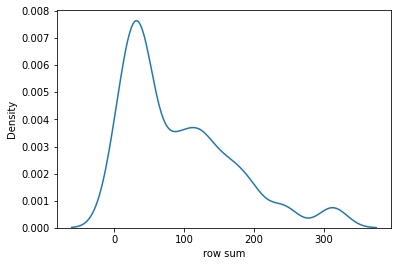

In [80]:
g = sns.kdeplot(log_df['row sum'], bw_adjust=0.5)

Here, we filter the log-normalised data so that the row sums are >0 (ie. there are 10 or more normalised reads in the row sum). We also sort by the index and the columns.

In [79]:
log_df = log_df[log_df['row sum'] > 0]
log_df.index = log_df.index.str.replace('g__', '').str.split(';').str[-1]

# sort by the index
log_df = log_df.sort_index()
# sort by the column labels
log_df = log_df.sort_index(axis=1)



### plot the data

This heat map summarises the abundance per sample

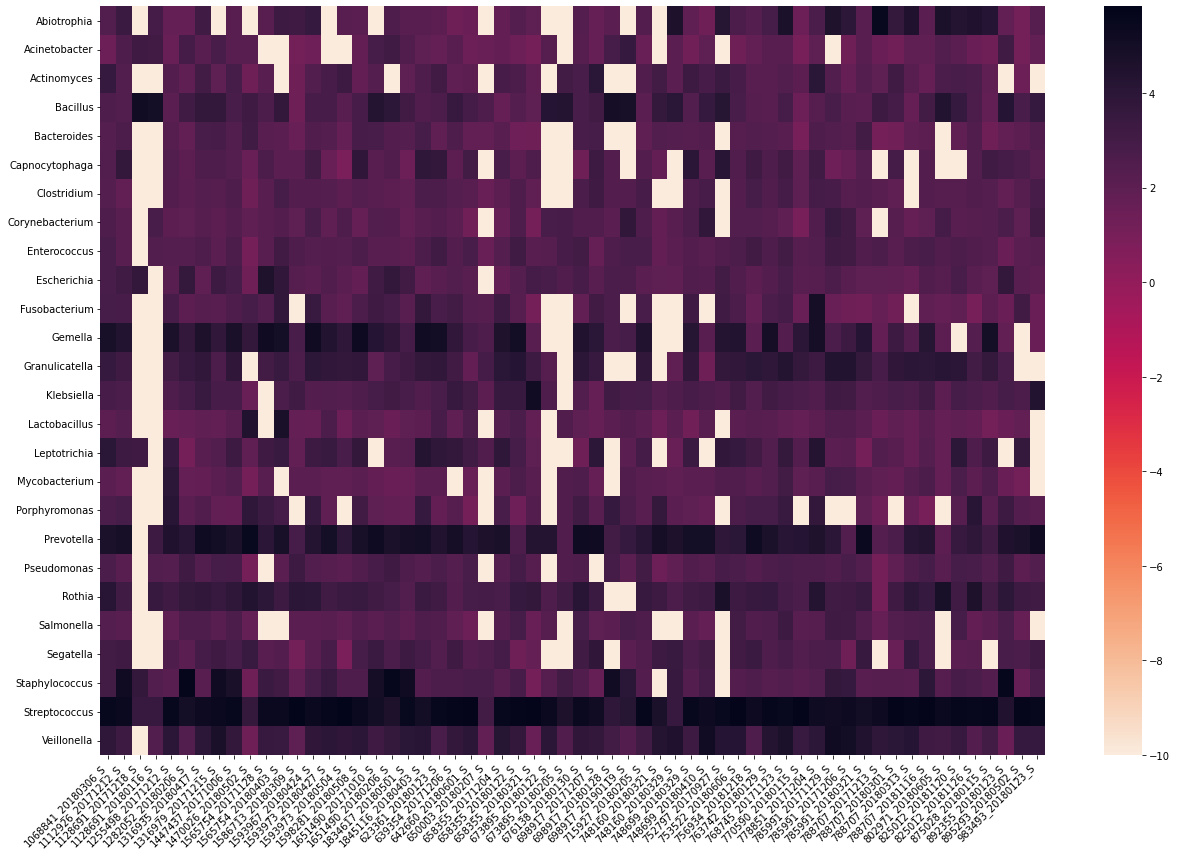

In [78]:
fig, ax = plt.subplots(figsize=(18, 12))
g = sns.heatmap(data=log_df.iloc[:, :-1], ax=ax, cmap="rocket_r")
g.set_xlabel("")
g.set_ylabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('minion_taxonomy_heatmap.png')

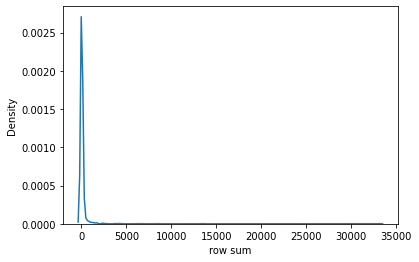

In [83]:
# sqrt transform the data
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(df)
sqrt_genus['row sum'] = sqrt_genus.sum(axis=1)
g = sns.kdeplot(sqrt_genus['row sum'], bw_adjust=0.5)

In [86]:
sqrt_genus = sqrt_genus[sqrt_genus['row sum'] > 500]
sqrt_genus.index = sqrt_genus.index.str.replace('g__', '').str.split(';').str[-1]

# sort by the index
sqrt_genus = sqrt_genus.sort_index()
# sort by the column labels
sqrt_genus = sqrt_genus.sort_index(axis=1)

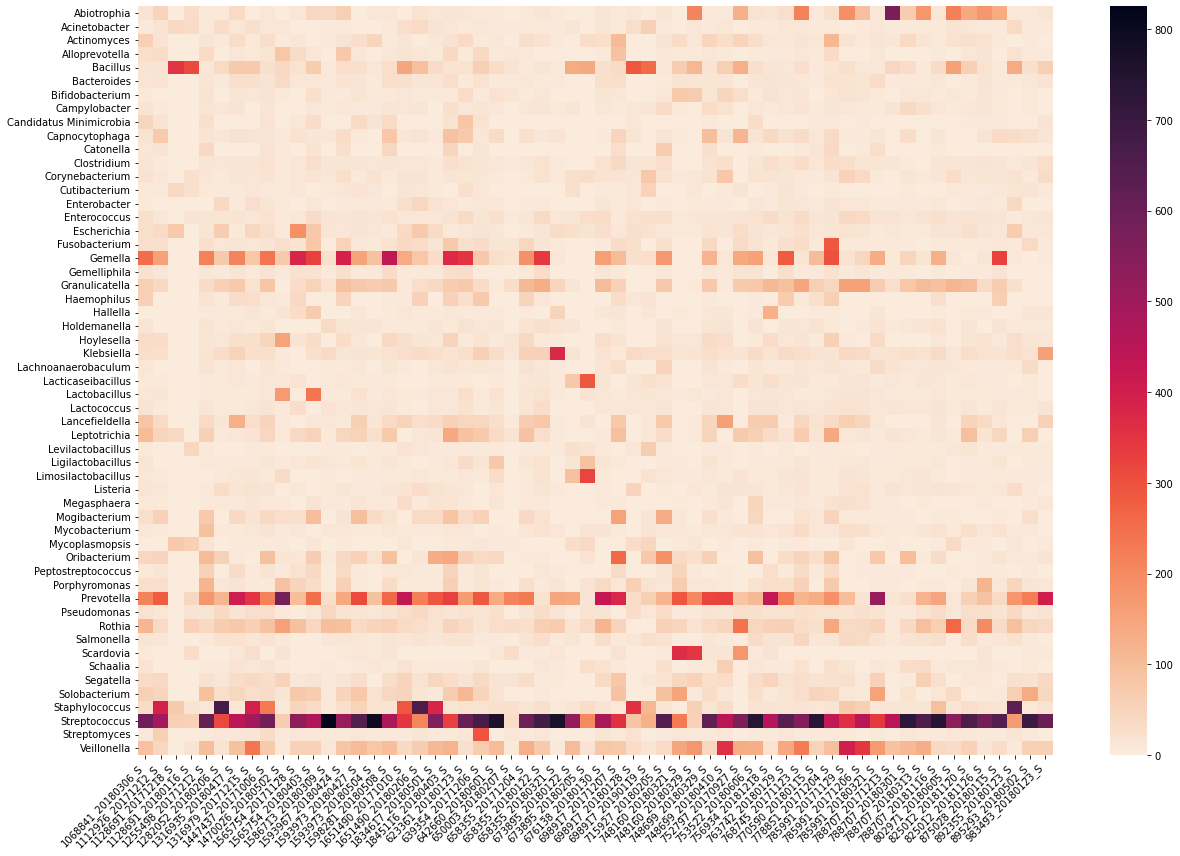

In [87]:
fig, ax = plt.subplots(figsize=(18, 12))
g = sns.heatmap(data=sqrt_genus.iloc[:, :-1], ax=ax, cmap="rocket_r")
g.set_xlabel("")
g.set_ylabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('minion_taxonomy_heatmap.png')